# Reading Data

In [10]:
import pandas as pd
import numpy as np 


# settings to get a good view of data 
# this code forces python to show max row and max columns
from IPython import display
pd.set_option("display.max_columns",50)
pd.set_option("display.max_colwidth",400)
pd.set_option("display.max_rows",300)

data = pd.read_csv('csv_result-chronic_kidney_disease.csv', index_col='id')
data.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
2,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# EDA and Data Cleaning

In [12]:
print(data.shape)
#my data has 400 records on 26 attributes

print(data.isnull().sum())  
# all question marks need to be replaced with null so pandas may identify it

print(data.info())
#It has lot of unwanted value represented by "?" we can replace it with an NAN and later decide how to handle the NAN

(400, 25)
'age'      0
'bp'       0
'sg'       0
'al'       0
'su'       0
'rbc'      0
'pc'       0
'pcc'      0
'ba'       0
'bgr'      0
'bu'       0
'sc'       0
'sod'      0
'pot'      0
'hemo'     0
'pcv'      0
'wbcc'     0
'rbcc'     0
'htn'      0
'dm'       0
'cad'      0
'appet'    0
'pe'       0
'ane'      0
'class'    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   'age'    400 non-null    object
 1   'bp'     400 non-null    object
 2   'sg'     400 non-null    object
 3   'al'     400 non-null    object
 4   'su'     400 non-null    object
 5   'rbc'    400 non-null    object
 6   'pc'     400 non-null    object
 7   'pcc'    400 non-null    object
 8   'ba'     400 non-null    object
 9   'bgr'    400 non-null    object
 10  'bu'     400 non-null    object
 11  'sc'     400 non-null    object
 12  'sod'    400 non-null    obje

In [14]:
data.replace('?',np.nan,inplace= True)
data.isnull().sum()

'age'        9
'bp'        12
'sg'        47
'al'        46
'su'        49
'rbc'      152
'pc'        65
'pcc'        4
'ba'         4
'bgr'       44
'bu'        19
'sc'        17
'sod'       87
'pot'       88
'hemo'      52
'pcv'       71
'wbcc'     106
'rbcc'     131
'htn'        2
'dm'         2
'cad'        2
'appet'      1
'pe'         1
'ane'        1
'class'      0
dtype: int64

In [18]:
# All index values are enclosed in quote ('') lets sort it out:
cols=data.columns
print(type(cols.dtype)) , cols

<class 'numpy.dtypes.ObjectDType'>


(None,
 Index([''age'', ''bp'', ''sg'', ''al'', ''su'', ''rbc'', ''pc'', ''pcc'',
        ''ba'', ''bgr'', ''bu'', ''sc'', ''sod'', ''pot'', ''hemo'', ''pcv'',
        ''wbcc'', ''rbcc'', ''htn'', ''dm'', ''cad'', ''appet'', ''pe'',
        ''ane'', ''class''],
       dtype='object'))

In [22]:
col=pd.Series(cols,copy=True)
print(type(col))
print(col)

<class 'pandas.core.series.Series'>
0       'age'
1        'bp'
2        'sg'
3        'al'
4        'su'
5       'rbc'
6        'pc'
7       'pcc'
8        'ba'
9       'bgr'
10       'bu'
11       'sc'
12      'sod'
13      'pot'
14     'hemo'
15      'pcv'
16     'wbcc'
17     'rbcc'
18      'htn'
19       'dm'
20      'cad'
21    'appet'
22       'pe'
23      'ane'
24    'class'
dtype: object


In [26]:
for i in range(25):
    col[i]=col[i].replace("'",'')
print(col)

0       age
1        bp
2        sg
3        al
4        su
5       rbc
6        pc
7       pcc
8        ba
9       bgr
10       bu
11       sc
12      sod
13      pot
14     hemo
15      pcv
16     wbcc
17     rbcc
18      htn
19       dm
20      cad
21    appet
22       pe
23      ane
24    class
dtype: object


In [80]:
data.columns=col

### now the quote is removed as we can see in the columns name
data.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
2,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
6,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,25,1.1,142,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
7,68,70,1.010,0,0,NaN,normal,notpresent,notpresent,100,54,24.0,104,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
8,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
9,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,60,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd


In [50]:
data.iloc[:,0].value_counts().sum() + data.iloc[:,0].isnull().sum()

400

In [56]:
for c in range(25):
    print(data.columns[c],"-",data.iloc[:,c].value_counts().sum()        
          +data.iloc[:,c].isnull().sum())
# after checking i verified that adding null values and all the other values we have the same count as the original

age - 400
bp - 400
sg - 400
al - 400
su - 400
rbc - 400
pc - 400
pcc - 400
ba - 400
bgr - 400
bu - 400
sc - 400
sod - 400
pot - 400
hemo - 400
pcv - 400
wbcc - 400
rbcc - 400
htn - 400
dm - 400
cad - 400
appet - 400
pe - 400
ane - 400
class - 400


In [60]:
for c in range(25):
    print(data.columns[c],"------------------------\n",
          data.iloc[:,c].describe())
    
#As above code incorrect data type for most cols , 
#we need to assign approriate datatype to all a the cols

age ------------------------
 count     391
unique     76
top        60
freq       19
Name: age, dtype: object
bp ------------------------
 count     388
unique     10
top        80
freq      116
Name: bp, dtype: object
sg ------------------------
 count       353
unique        5
top       1.020
freq        106
Name: sg, dtype: object
al ------------------------
 count     354
unique      6
top         0
freq      199
Name: al, dtype: object
su ------------------------
 count     351
unique      6
top         0
freq      290
Name: su, dtype: object
rbc ------------------------
 count        248
unique         2
top       normal
freq         201
Name: rbc, dtype: object
pc ------------------------
 count        335
unique         2
top       normal
freq         259
Name: pc, dtype: object
pcc ------------------------
 count            396
unique             2
top       notpresent
freq             354
Name: pcc, dtype: object
ba ------------------------
 count            396
unique      

In [62]:
# get a copy of data frame on which we will work
df= data.copy()

In [64]:
# replacing a categorical value with a suitable numerical identifier
# for modelling step we need to remeber "ckd =1 "    & "not_ckd =0"
replace={'normal':1,
        'abnormal':0,
        'present':1,
        'notpresent':0,
        'yes':1,
        'no':0,
        'ckd':1,
        'notckd':0,
        'good':1,
        'poor':0,
         "1.020":0,
         "1.010":1,
         "1.025":2,
         "1.015":3,
         "1.005":4}

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=df[i].replace(replace)
        (df[i].value_counts(),df[i].isnull().sum())

C:\Users\Appex\AppData\Local\Temp\ipykernel_348\1908334797.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i]=df[i].replace(replace)
C:\Users\Appex\AppData\Local\Temp\ipykernel_348\1908334797.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i]=df[i].replace(replace)
C:\Users\Appex\AppData\Local\Temp\ipykernel_348\1908334797.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To o

In [68]:
# pd reads data as object if it unsure of it's data type ,
# so for futher working with this data we need to bring in to float type
df=df.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe     

In [70]:
print(df.describe(),df.isnull().sum())

              age          bp          sg          al          su         rbc  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  248.000000   
mean    51.483376   76.469072    1.413598    1.016949    0.450142    0.810484   
std     17.169714   13.683637    1.179386    1.352679    1.099191    0.392711   
min      2.000000   50.000000    0.000000    0.000000    0.000000    0.000000   
25%     42.000000   70.000000    0.000000    0.000000    0.000000    1.000000   
50%     55.000000   80.000000    1.000000    0.000000    0.000000    1.000000   
75%     64.500000   80.000000    2.000000    2.000000    0.000000    1.000000   
max     90.000000  180.000000    4.000000    5.000000    5.000000    1.000000   

               pc         pcc          ba         bgr          bu          sc  \
count  335.000000  396.000000  396.000000  356.000000  381.000000  383.000000   
mean     0.773134    0.106061    0.055556  148.036517   57.425722    3.072454   
std      0.419431    0.3083

In [78]:
c= df.dropna(how='all',axis =0)## lets drop rows which are all nan
c.duplicated().value_counts() # it has no duplicate rows

False    400
Name: count, dtype: int64

In [13]:
# Arrange cols of data in order : numerical value first and then categorical value
new_order=['age','bp','bgr','bu','sc','sod','pot','hemo',
           'pcv','wbcc','rbcc','sg','al','su','rbc','pc',
           'pcc','ba','htn','dm','cad','appet','pe','ane','class']
df=df.reindex(columns=new_order)
df.columns   
#AS one can see that by above code id col id droped and is arranged as name mentioned in new_order

Index(['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
       'rbcc', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [14]:
df.sg

0      0.0
1      0.0
2      1.0
3      4.0
4      1.0
      ... 
395    0.0
396    2.0
397    0.0
398    2.0
399    2.0
Name: sg, Length: 400, dtype: float64

In [15]:
# #lets substitute all numerical values with mean and categorical nan 
# #with 0 and see its performance on trainning and validation set
df.iloc[:,0:11].fillna(df.iloc[:,0:11].mean(),inplace=True)
df.iloc[:,11:].fillna(0,inplace =True)

C:\Users\sai weld india\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\sai weld india\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
# getting dummy variables of "al" feature categorical variable
dummy_al=pd.get_dummies(df['al'],prefix="al",drop_first=True)
df.drop("al",axis=1,inplace=True)
df=pd.concat([df,dummy_al],axis=1)
df

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,sg,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,0
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1,0
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,1.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,1,0,0,0
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,1,0
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0
396,42.0,70.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0
397,12.0,80.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0
398,17.0,60.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0


In [17]:
# getting dummy variable of "su" categorical variable
dummy_su=pd.get_dummies(df['su'],prefix='su',drop_first=True)
df=pd.concat([df,dummy_su],axis=1)
df.drop("su",inplace=True,axis=1)

In [18]:
# Getting dummy variable for "sg" feature
dummy_sg=pd.get_dummies(df['sg'],drop_first=True,prefix="sg")
df=pd.concat([df,dummy_sg],axis=1)
df.drop("sg",axis=1,inplace=True)

In [19]:
df.isnull().sum()

age       0
bp        0
bgr       0
bu        0
sc        0
sod       0
pot       0
hemo      0
pcv       0
wbcc      0
rbcc      0
rbc       0
pc        0
pcc       0
ba        0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
al_1.0    0
al_2.0    0
al_3.0    0
al_4.0    0
al_5.0    0
su_1.0    0
su_2.0    0
su_3.0    0
su_4.0    0
su_5.0    0
sg_1.0    0
sg_2.0    0
sg_3.0    0
sg_4.0    0
dtype: int64

In [20]:
clas = df.pop('class')
df.insert(35,"class",clas)
df

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,al_1.0,al_2.0,al_3.0,al_4.0,al_5.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0,sg_1.0,sg_2.0,sg_3.0,sg_4.0,class
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1.0
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.0
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
396,42.0,70.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
397,12.0,80.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
398,17.0,60.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0


# Visualising data features & miscellaneous

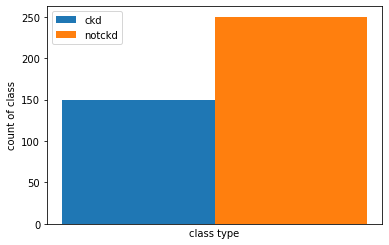

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Lets see how balanced our prediction variable is 
plt.hist([df['class'][250:],df['class'][:250]],1,label=['ckd','notckd'])
plt.xlabel('class type')
plt.ylabel('count of class')
plt.legend()
plt.xticks([])
plt.show()

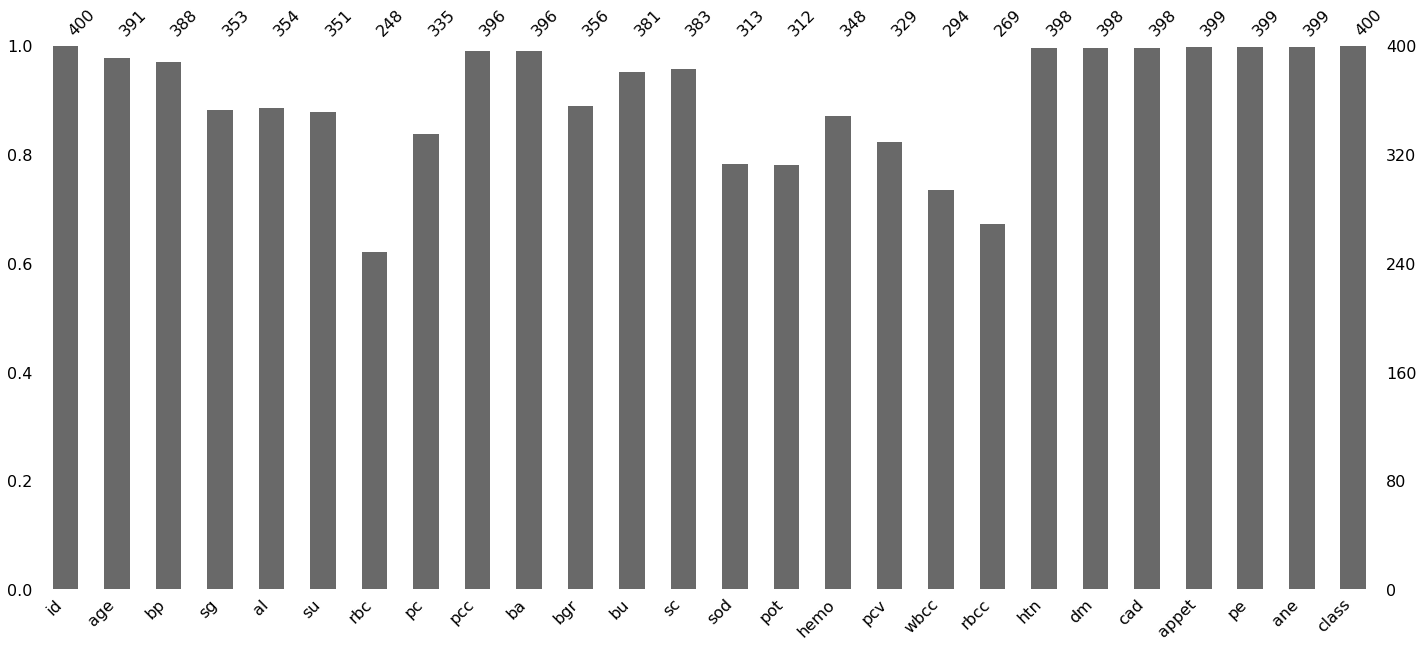

In [22]:
# library to show the null value distribution on raw dataset
import missingno as msno

# Collection of null values in  the original datasets
msno.bar(data)
plt.show()

#### Visualising relationship between numerical attributes and class variables

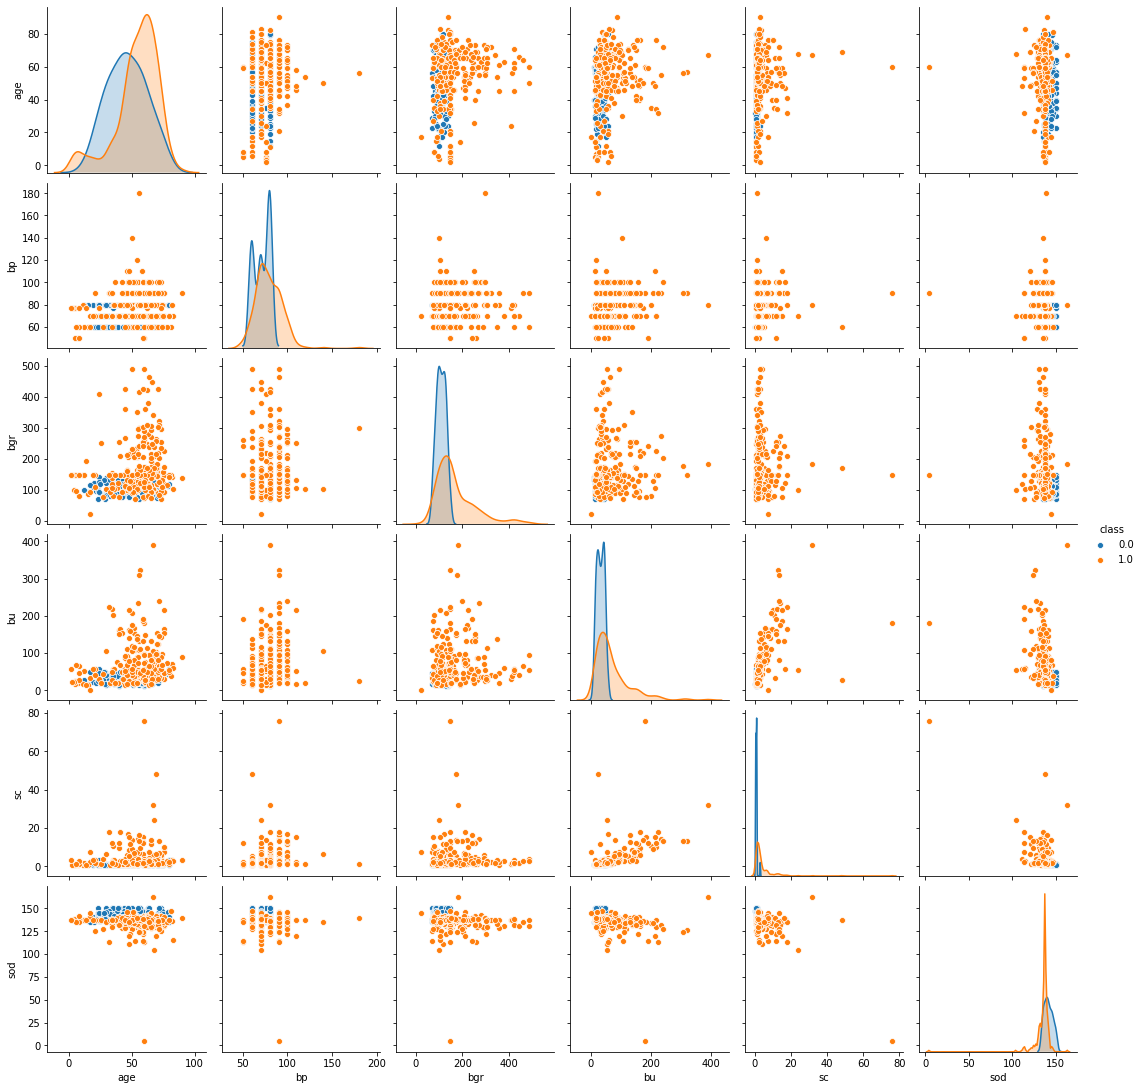

In [23]:
# first half of the numerical value
a=[0,1,2,3,4,5,35]
sns.pairplot(df.iloc[:, a],hue = "class")
plt.show()

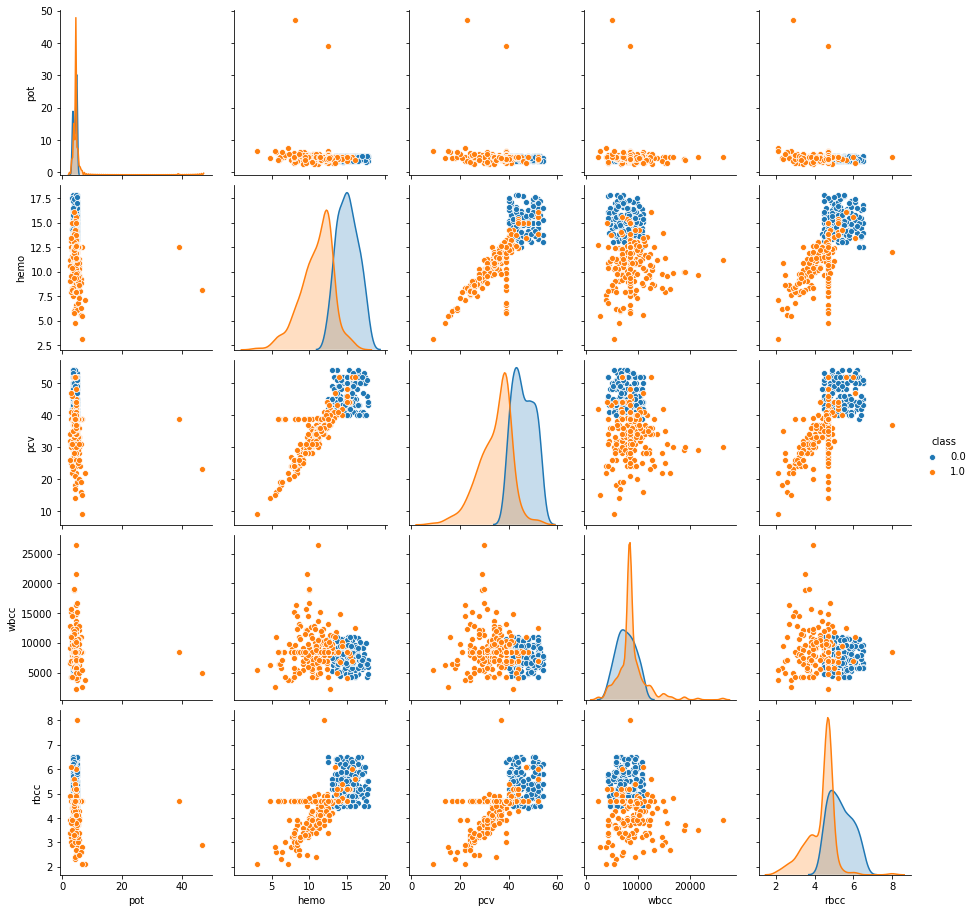

In [24]:
b=[6,7,8,9,10,35]
sns.pairplot(df.iloc[:, b],hue = "class")
plt.show()

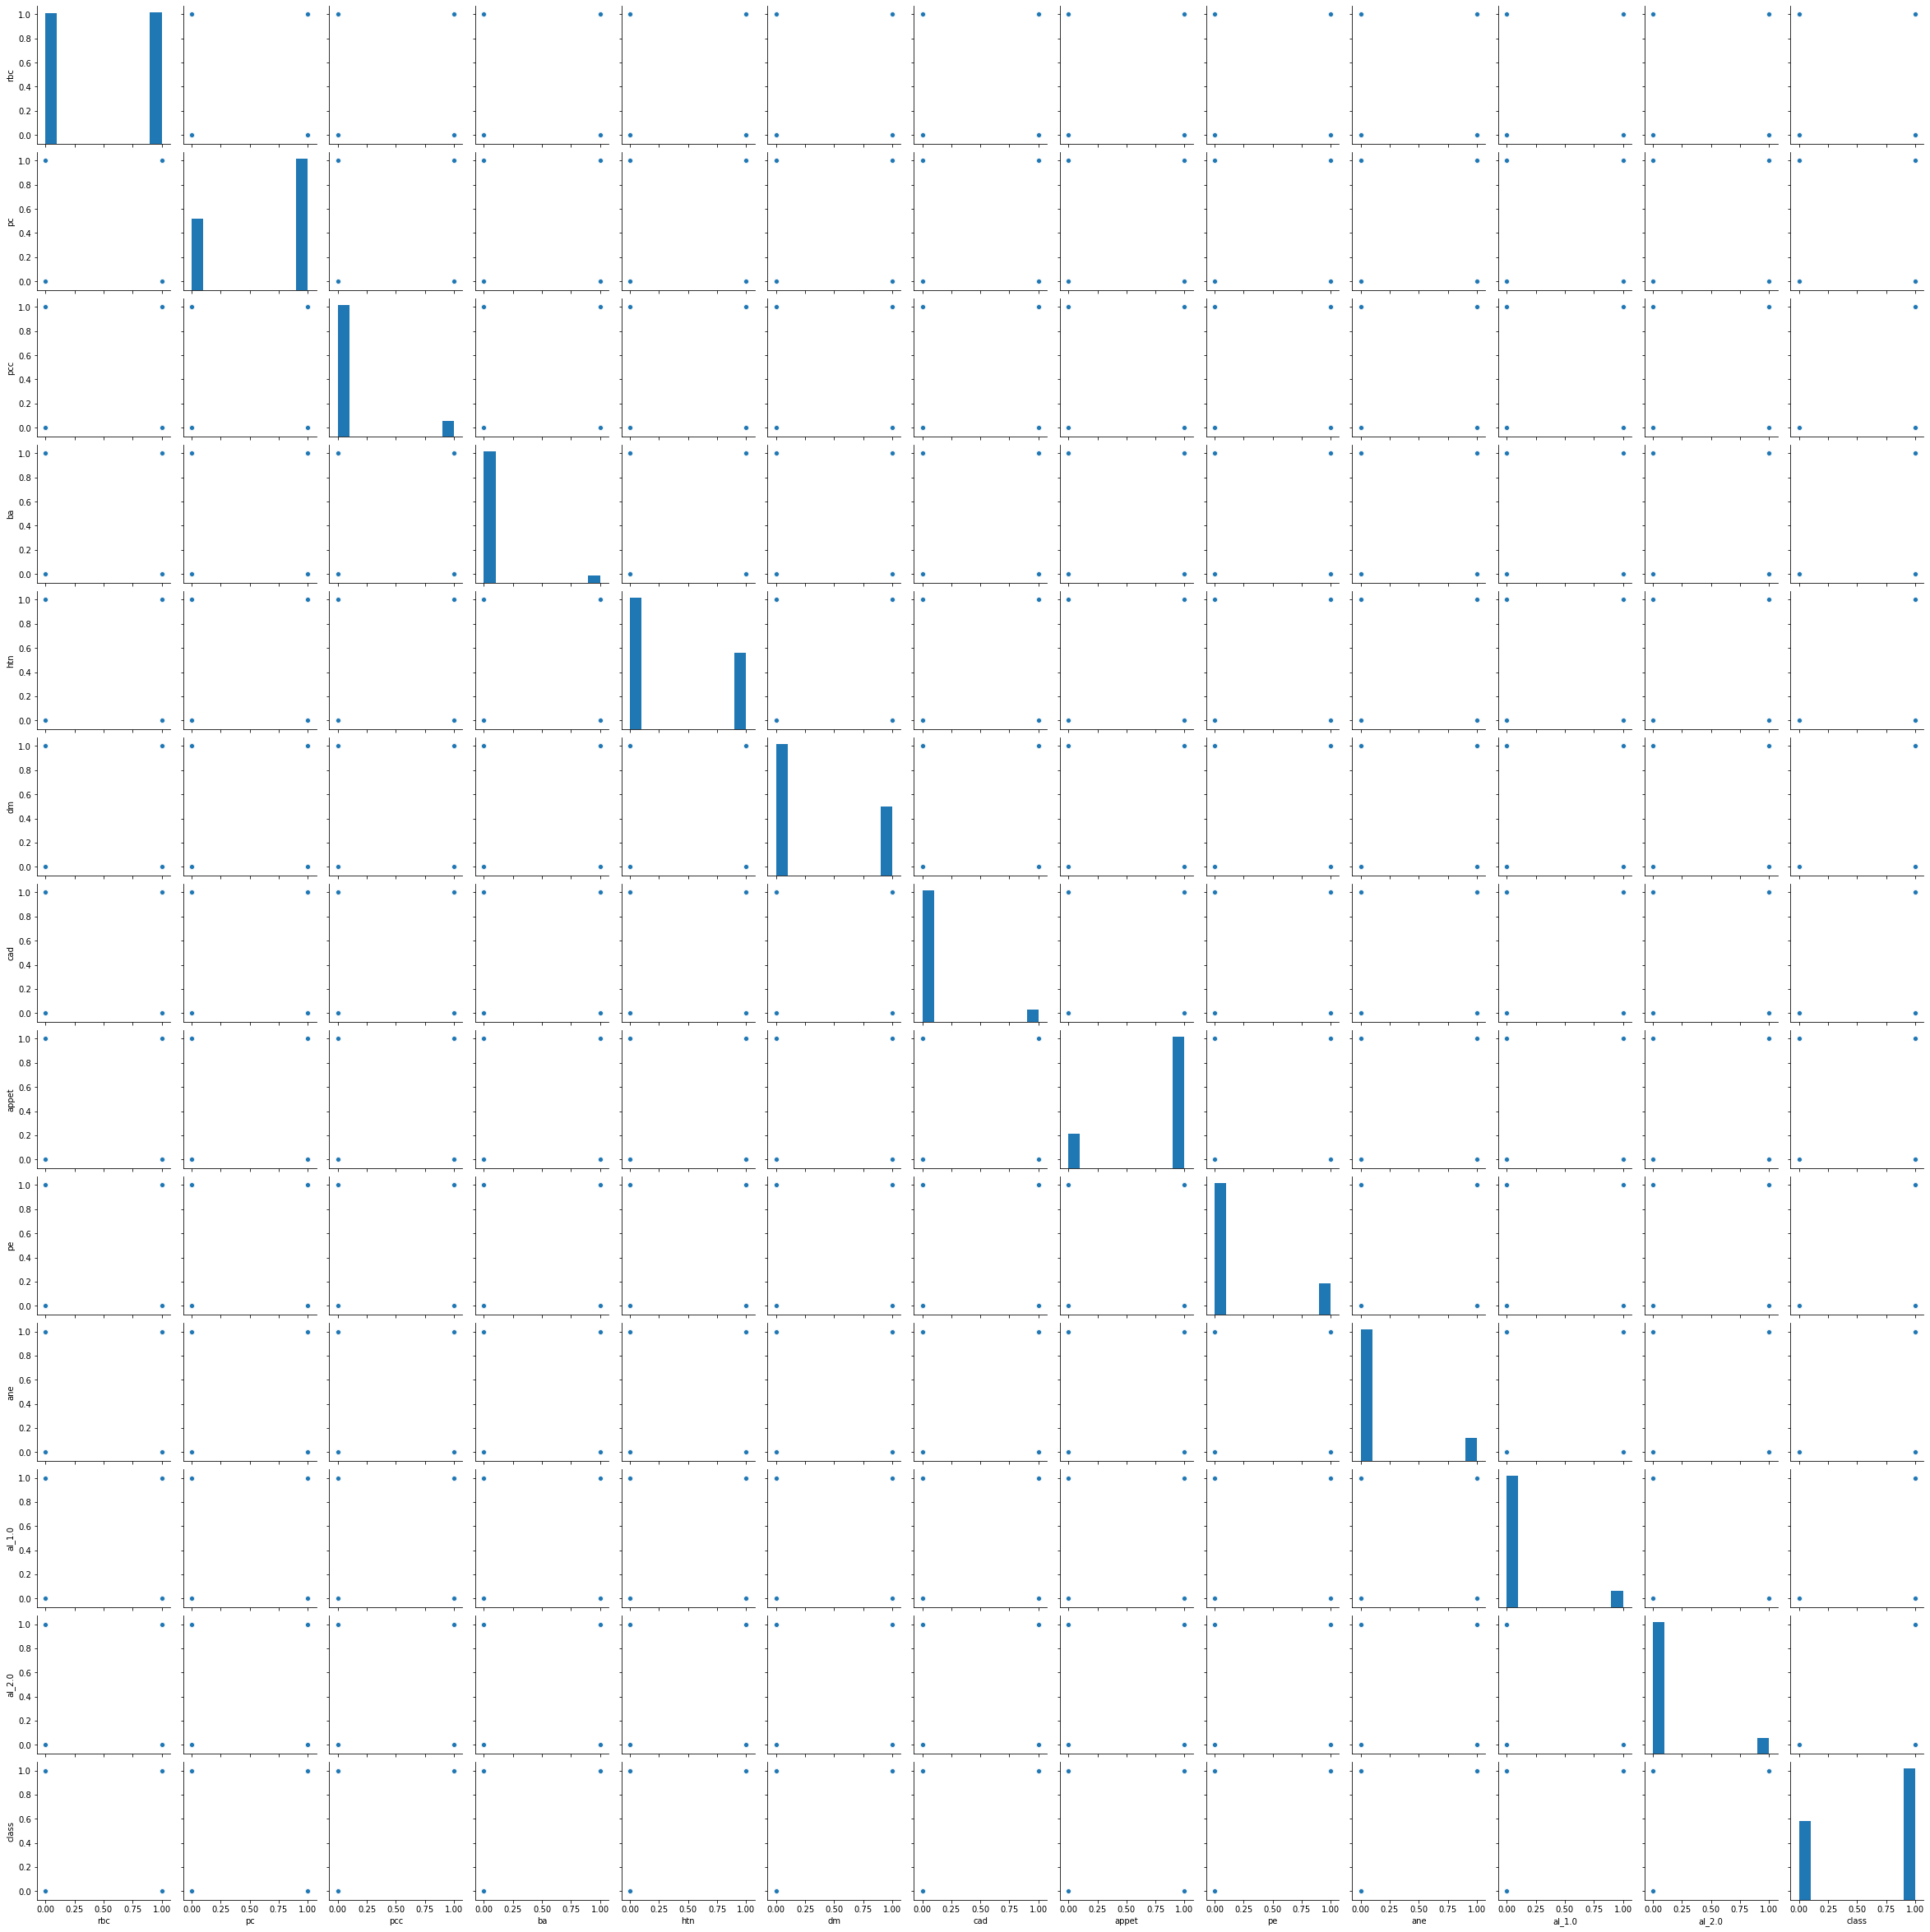

In [25]:
c=[11,12,13,14,15,16,17,18,19,20,21,22,35]
sns.pairplot(df.iloc[:, c])
plt.show()

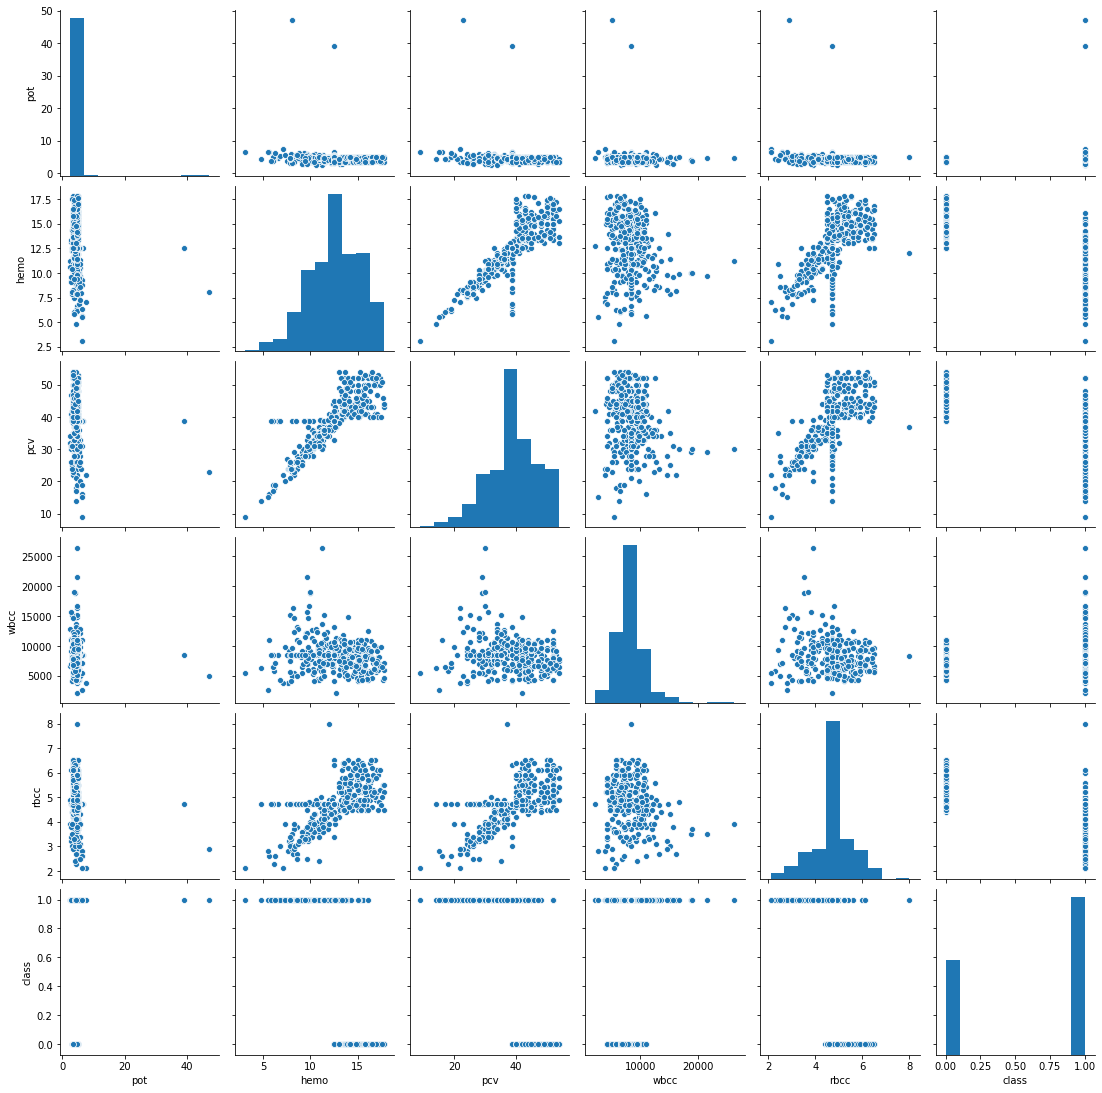

In [26]:
c=[23,24,25,26,27,28,29,30,31,32,33,34,35]
sns.pairplot(df.iloc[:,b])
plt.show()

##### Correlation-plot

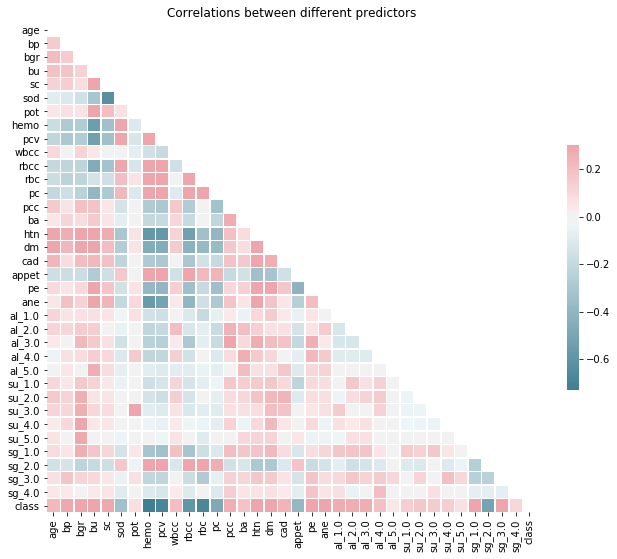

In [27]:
cor=df.corr()
mask=np.zeros_like(cor,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.savefig('Correlatio_matrix_heat_map.pdf', format='pdf', dpi=1200)
plt.show()

# from below graph we can see that none attributes are highly correlated ,
# which will cause a high bias in our model creation

# Adressing Class imbalance problem

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score

##### performance of most-frequent sampling

In [29]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],
                                                 df.iloc[:,-1],
                                                 test_size=0.3,
                                                 random_state=28)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

dummy= DummyClassifier(strategy='most_frequent').fit(x_train,y_train)
dummy_pred= dummy.predict(x_test)

(280, 35) (120, 35) (280,) (120,)


In [30]:
#Checking unique labels
print('Unique predicted labels',np.unique(dummy_pred))

#Checking accuracy 
print('Testing Score',accuracy_score(y_test,dummy_pred))

Unique predicted labels [1.]
Testing Score 0.6166666666666667


In [31]:
# Testing the result on upsampled data set

In [32]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(solver = 'liblinear').fit(x_train,y_train)

lr_pred=lr.predict(x_test)

#checking accuracy 
print(accuracy_score(y_test,lr_pred))

#checking f1-score
print(f1_score(y_test,lr_pred))

#checking recall
print(recall_score(y_test,lr_pred))

0.9833333333333333
0.9863013698630138
0.972972972972973


##### performance of upsampling of minority class

In [33]:
from sklearn.utils import resample 

# Sepearate input features and target
y= df['class']
x=df.drop('class',axis=1)

In [34]:
# setting up testing and training sets 
x_trn,x_test,y_trn,y_tst=train_test_split(x,y,test_size=0.25,random_state=27)


# Concatenate our training data back together 
x=pd.concat([x_trn,y_trn],axis=1)

# seperate minority and majority classes
ckd=x[x['class']==1]
not_ckd=x[x['class']==0]

In [35]:
# Upsample minority 
ckd_not_upsampled =  resample(not_ckd,replace=True,  #sample with replacement
                         n_samples=len(ckd),   # match number in majority class
                         random_state=27)         #reproducible results

In [36]:
# combine majority and unsampled minority
upsampled =pd.concat([ckd,ckd_not_upsampled])

#check new class counts
upsampled['class'].value_counts()

0.0    189
1.0    189
Name: class, dtype: int64

In [37]:
#trying logistic regression again with the balanced datset
y_train=upsampled['class']
x_train=upsampled.drop('class',axis=1)

unsampled=LogisticRegression(solver='liblinear').fit(x_train,y_train)

unsampled_pred=unsampled.predict(x_test)

In [38]:
#checking accuracy 
print(accuracy_score(y_tst,unsampled_pred))

#f1 score 
print(f1_score(y_tst,unsampled_pred))

#recall_score
print(recall_score(y_tst,unsampled_pred))

0.98
0.9833333333333333
0.9672131147540983


##### Performance of undersampling on majority class

In [39]:
# still using our seperated classes ckd and not_ckd from above

#down sample majority 
ckd_downsampled = resample(ckd,
                          replace=False,    #sample without replacement
                          n_samples=len(not_ckd),     #match minority 
                          random_state=27)        #reproducible results

# combine minority and downsampled majority 
downsampled=pd.concat([ckd_downsampled,not_ckd])

#checking counts 
downsampled['class'].value_counts()

0.0    111
1.0    111
Name: class, dtype: int64

In [40]:
# trying resampling regression again with the undersampled dataset

y_train=downsampled['class']
x_train=downsampled.drop('class',axis=1)

undersampled=LogisticRegression(solver='liblinear').fit(x_train,y_train)

undersampled_pred=undersampled.predict(x_test)

#checking accuraccy 
accuracy_score(y_tst,undersampled_pred)

0.98

In [41]:
#checking accuraccy 
print(accuracy_score(y_tst,undersampled_pred))

#f1 score
print(f1_score(y_tst,undersampled_pred))

#recall
print(recall_score(y_tst,undersampled_pred))

0.98
0.9833333333333333
0.9672131147540983


##### Performance of SMOTE algorithm on minority class

In [42]:
#Here we will use imblearn's SMOTE or Synthetic Minority Oversampling Technique

# SMOTE uses a nearest neighbours algorithm to generate new synthetic data for training our model

# Again it's important to generate the new samples only in the training set to ensure 
#our model generalizes well to unseen data


In [43]:
from imblearn.over_sampling import SMOTE
# Seperate input features and target 
y=df['class']
x=df.drop('class',axis=1)

#setting up testing and training sets 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)

sm=SMOTE(random_state=27,sampling_strategy='minority')
x_train,y_train=sm.fit_sample(X_train,y_train)

In [44]:
smote =LogisticRegression(solver='liblinear').fit(x_train,y_train)

smote_pred=smote.predict(X_test)

#checking accuracy 
print(accuracy_score(y_test,smote_pred))

#f1 score
print(f1_score(y_test,smote_pred))

#recall
print(recall_score(y_test,smote_pred))

0.98
0.9833333333333333
0.9672131147540983


In [45]:
# Hence performance of upsamling and SMOTE were always the same ,
#we can use any of those in our final modelling 


### PCA analysis

In [46]:
from sklearn.preprocessing import StandardScaler
af= df.copy()
scaler= StandardScaler()
scaled= scaler.fit_transform(af.iloc[:,:11])
a = pd.DataFrame(scaled,index  = None)


In [47]:
af['class']=df['class']
af['class'].unique()

array([1., 0.])

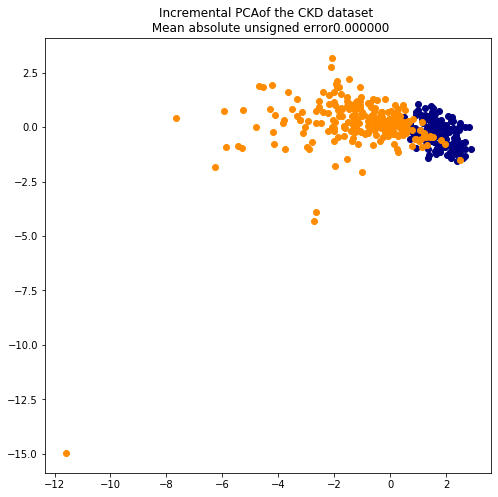

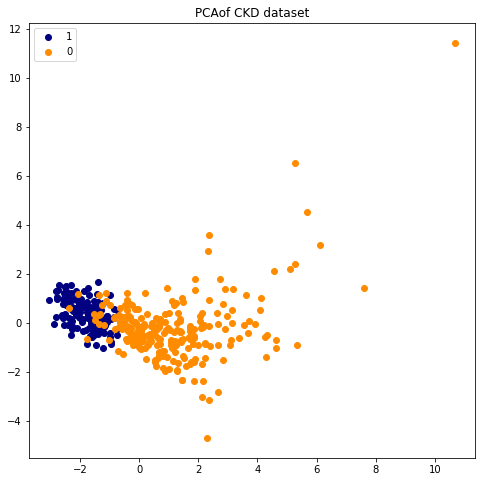

In [48]:
from sklearn.decomposition import IncrementalPCA, PCA
n_components = 3
ipca = IncrementalPCA(n_components=n_components,batch_size = 10)
X_ipca = ipca.fit_transform(a)

pca=PCA(n_components=n_components)
X_pca=pca.fit_transform(a)

colors=['navy','darkorange','turquoise']

for X_transformed,title in [(X_ipca ,'Incremental PCA'),(X_pca,"PCA")]:
    plt.figure(figsize=(8,8))
    for color,i,target_name in zip(colors,[0,1,2],[1,0]):
        plt.scatter(X_transformed[af['class']==i,0],X_transformed[af['class']==i,1],color=color,
                   lw=1,label=target_name)
        if "Incremental" in title:
            err = np.abs(np.abs(X_pca)-np.abs(X_pca)).mean()
            plt.title(title+"of the CKD dataset \n Mean absolute unsigned error" "%.6f"%err)
        else:
            plt.title(title+"of CKD dataset")
            plt.legend (loc = 'best',shadow=False,scatterpoints =1)
plt.savefig('PCA_Scatter_plot.pdf', format='pdf', dpi=1200)
plt.show()


In [49]:
ipca.explained_variance_ratio_,pca.explained_variance_ratio_

(array([0.32580612, 0.10495116, 0.09870406]),
 array([0.34646423, 0.12292712, 0.10290065]))

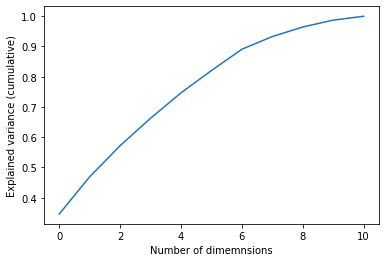

In [50]:
pca = PCA().fit(a)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of dimemnsions")
plt.ylabel("Explained variance (cumulative)")
plt.savefig('PCA_Explained_Variance_plot.pdf', format='pdf', dpi=1200)
plt.show()

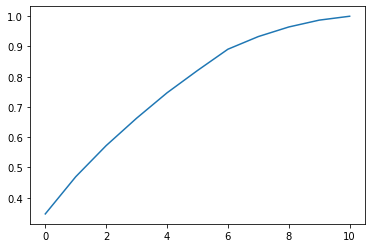

In [51]:
ipca = IncrementalPCA().fit(a)
plt.plot(np.cumsum(ipca.explained_variance_ratio_))
plt.show()

## Validation and learning curve

In [52]:
# Sklearn inbuilt fucnction for plotting learning curve
from sklearn.model_selection import learning_curve

In [53]:
# Function defined for ploting the learning vs validation curve

def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,
                       n_jobs=None,train_sizes=np.linspace(.1,1.0,5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.
    
    """
    if axes is None:
        _, axes = plt.subplots(1,3,figsize=(20,5))
        
        axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel('Score')
    train_sizes,train_scores,test_scores,fit_times, _ = \
        learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,
                      train_sizes=train_sizes,
                      return_times=True)
    train_scores_mean=np.mean(train_scores, axis=1)
    train_scores_std =np.std(train_scores,axis=1)
    test_scores_mean= np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    fit_times_mean= np.mean(fit_times,axis=1)
    fit_times_std = np.std(fit_times,axis=1)
    
    #Plot Learning Curve
    axes[0].grid()
    axes[0].fill_between(train_sizes,train_scores_mean-train_scores_std,
                        train_scores_mean+train_scores_std,alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes,test_scores_mean-test_scores_std,
                        test_scores_mean+test_scores_std,alpha=0.1,
                        color="g")
    axes[0].plot(train_sizes,train_scores_mean,'o-',color="r",
                 label="Training score")
    axes[0].plot(train_sizes,test_scores_mean,'o-',color="g",
                label="Cross-validation score")
    axes[0].legend(loc="best")
    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes,fit_times_mean,'o-')
    axes[1].fill_between(train_sizes,fit_times_mean-fit_times_std,
                        fit_times_mean+fit_times_std,alpha =0.1)
    axes[1].set_xlabel("Training exapmples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")
    
    #Plot fit times vs score 
    axes[2].grid()
    axes[2].plot(fit_times_mean,test_scores_mean,'o-')
    axes[2].fill_between(fit_times_mean,test_scores_mean-test_scores_std,
                        test_scores_mean+test_scores_std,alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    
    return plt

In [54]:
#Spliting my data into training and test set
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((300, 35), (100, 35), (378,), (100,))

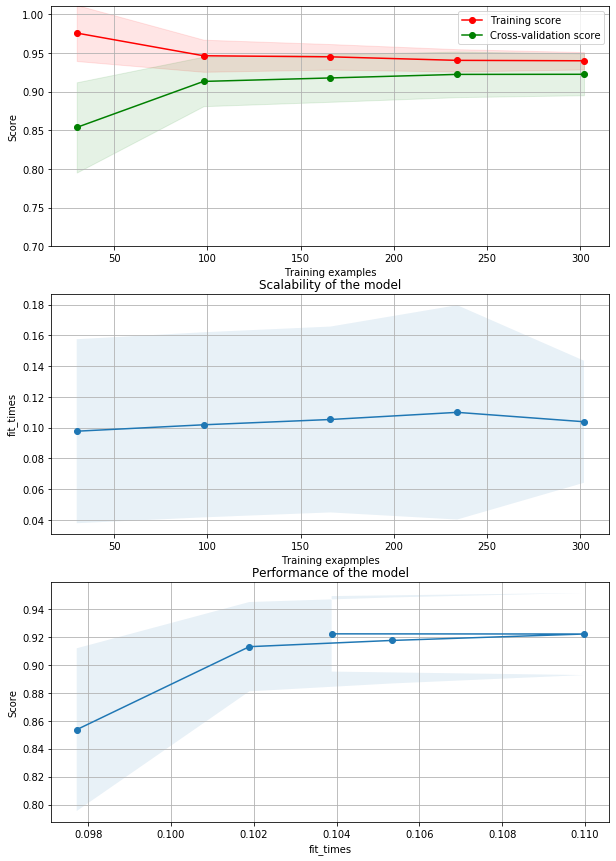

In [55]:
# plotting learning and validation curve for
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

fig,axes = plt.subplots(3,1,figsize=(10,15))
title="Logistic Regression"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
estimator=LogisticRegression()
plot_learning_curve(estimator,title,x_train,y_train,axes = axes,ylim=(0.7,1.01),
                cv = cv,n_jobs = 4)
plt.savefig('Logistic_Regression_Learning_Curve.pdf', format='pdf', dpi=1200)
plt.show()

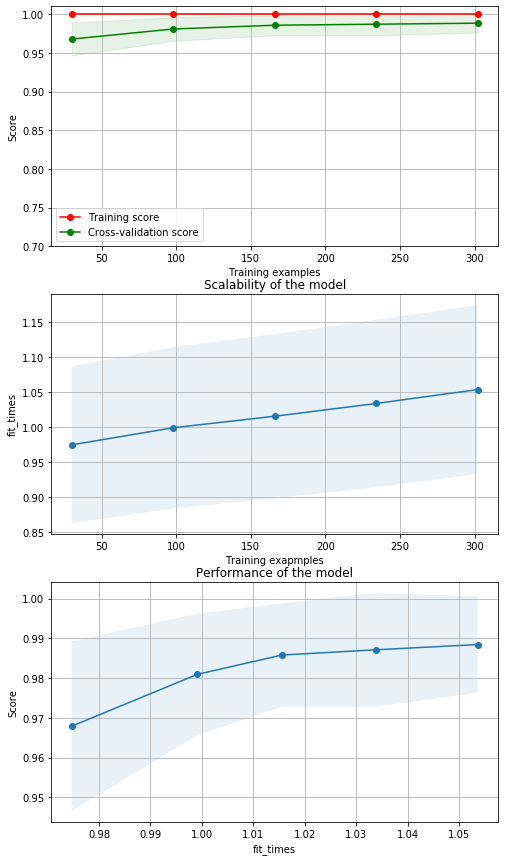

In [56]:
from sklearn.ensemble import RandomForestClassifier
fig,axes = plt.subplots(3,1,figsize=(8,15))
title="Random Forest"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
estimator= RandomForestClassifier()
plot_learning_curve(estimator,title,x_train,y_train,axes = axes,ylim=(0.7,1.01),
                cv = cv,n_jobs = 6)
plt.savefig('Random_Forest_Learning_Curve.pdf', format='pdf', dpi=1200)
plt.show()

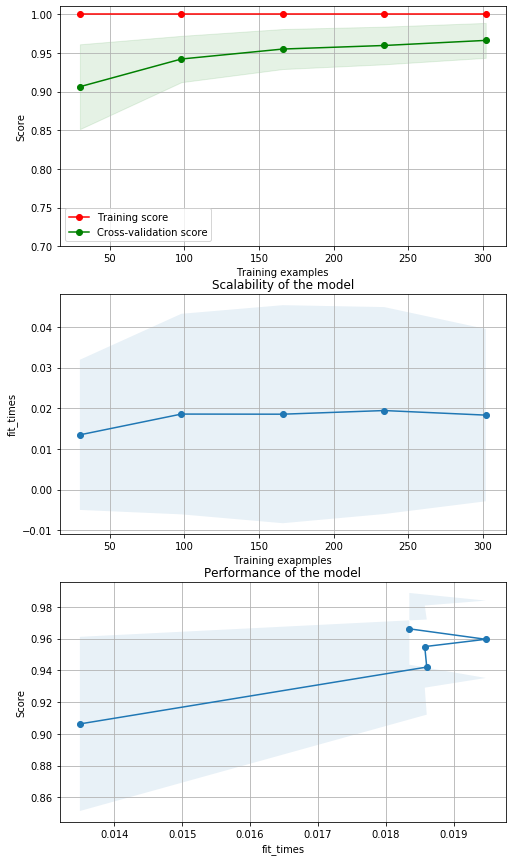

In [57]:
from sklearn.tree import DecisionTreeClassifier
fig,axes = plt.subplots(3,1,figsize=(8,15))
title="Decision Tree"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
estimator= DecisionTreeClassifier(criterion='entropy')
plot_learning_curve(estimator,title,x_train,y_train,axes = axes,ylim=(0.7,1.01),
                cv = cv,n_jobs = 6)

plt.show()

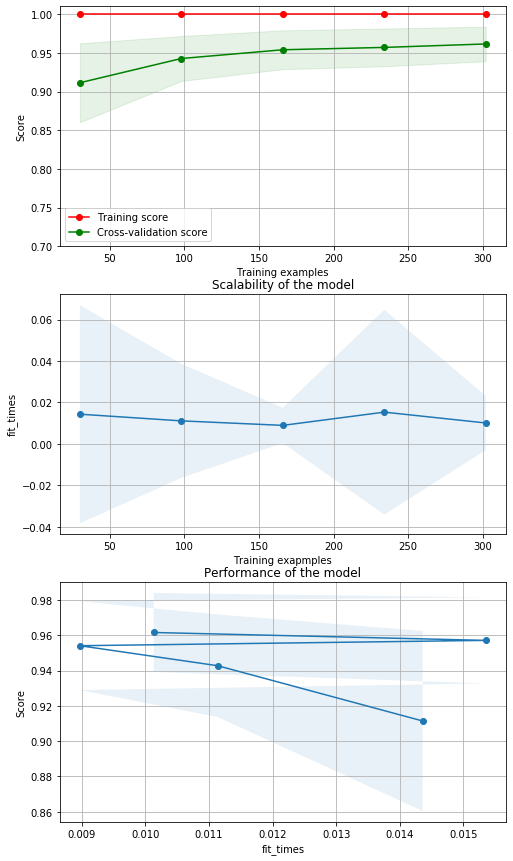

In [58]:
from sklearn.tree import DecisionTreeClassifier
fig,axes = plt.subplots(3,1,figsize=(8,15))
title="Decision Tree"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
estimator= DecisionTreeClassifier(criterion='gini')
plot_learning_curve(estimator,title,x_train,y_train,axes = axes,ylim=(0.7,1.01),
                cv = cv,n_jobs = 6)
plt.savefig('Decision_Tree_Learning_Curve.pdf', format='pdf', dpi=1200)
plt.show()

# fig shows underfit model

<module 'matplotlib.pyplot' from 'C:\\Users\\sai weld india\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

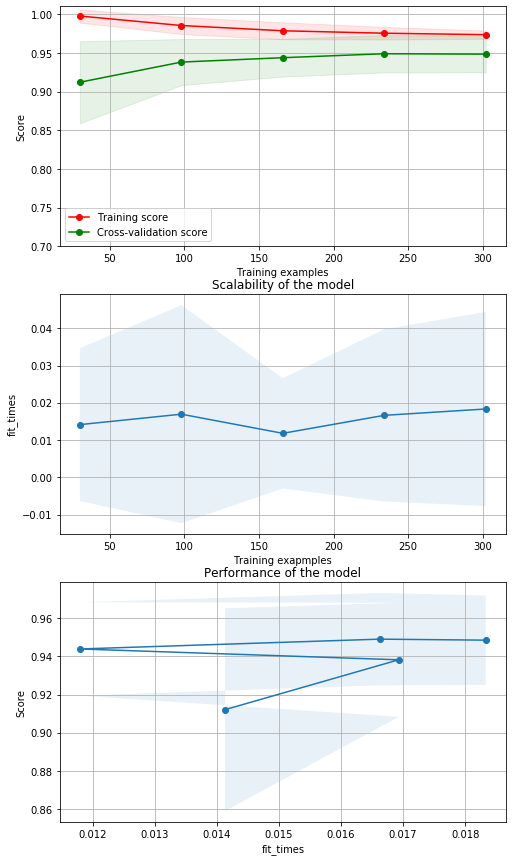

In [59]:
from sklearn.tree import DecisionTreeClassifier
fig,axes = plt.subplots(3,1,figsize=(8,15))
title="Decision Tree"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
estimator= DecisionTreeClassifier(criterion='gini',max_depth = 2)
plot_learning_curve(estimator,title,x_train,y_train,axes = axes,ylim=(0.7,1.01),
                cv = cv,n_jobs = 6)


# fig shows model is underfit

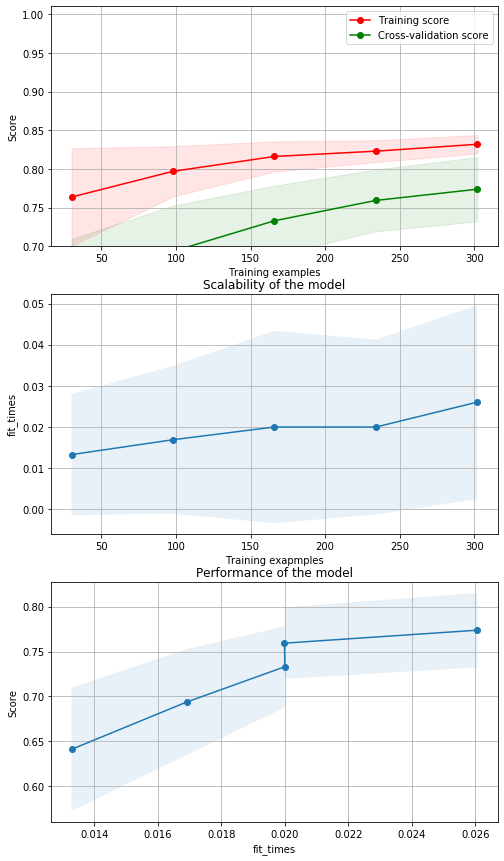

In [60]:
from sklearn.neighbors import KNeighborsClassifier
fig,axes = plt.subplots(3,1,figsize=(8,15))
title="Decision Tree"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
estimator= KNeighborsClassifier()
plot_learning_curve(estimator,title,x_train,y_train,axes = axes,ylim=(0.7,1.01),
                cv = cv,n_jobs = 6)
plt.show()

# figure shows model is underfiting 

###### From above learninig curve we can conclude that random forest classifier and logistic regression shows the better model Performance

# Model Creation

### Logistic Regression

In [61]:
from sklearn.utils import resample 

# Sepearate input features and target
y= df['class']
x=df.drop('class',axis=1)

In [62]:
# setting up testing and training sets 
x_trn,x_tst,y_trn,y_tst=train_test_split(x,y,test_size=0.25,random_state=27)


# Concatenate our training data back together 
x=pd.concat([x_trn,y_trn],axis=1)

# seperate minority and majority classes
ckd=x[x['class']==1]
not_ckd=x[x['class']==0]

In [63]:
# Upsample minority 
ckd_not_upsampled =  resample(not_ckd,replace=True,  #sample with replacement
                         n_samples=len(ckd),   # match number in majority class
                         random_state=27)         #reproducible results

In [64]:
# combine majority and unsampled minority
upsampled =pd.concat([ckd,ckd_not_upsampled])

#check new class counts
upsampled['class'].value_counts()

0.0    189
1.0    189
Name: class, dtype: int64

In [65]:
#trying logistic regression again with the balanced datset
y_train=upsampled['class']
x_train=upsampled.drop('class',axis=1)

clf1=LogisticRegression(solver='liblinear').fit(x_train,y_train)

log_pred=clf1.predict(x_test)

In [66]:
#checking accuracy 
print(accuracy_score(y_tst,log_pred))

#f1 score 
print(f1_score(y_tst,log_pred))

#recall_score
print(recall_score(y_tst,log_pred))

0.98
0.9833333333333333
0.9672131147540983


In [67]:
# Print Classification report
from sklearn.metrics import classification_report
print(classification_report(y_tst,log_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        39
         1.0       1.00      0.97      0.98        61

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [68]:
# final prediction may vary as in every alternate try grid search may converge to a different value 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_tst,log_pred)
cm
cm=cm/cm.sum(axis=1) #normalise the confusion matrix to see in percentage
cm

array([[1.        , 0.        ],
       [0.05128205, 0.96721311]])

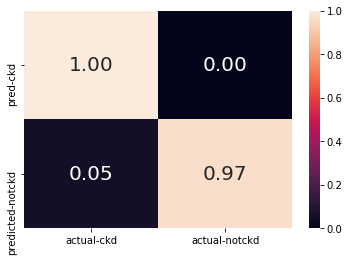

In [69]:
#visual interpretation of the confusion matrix 

sns.heatmap(cm,annot=True,xticklabels=['actual-ckd','actual-notckd'],yticklabels=['pred-ckd','predicted-notckd'],fmt='0.2f',annot_kws={"size": 20})
plt.savefig('Logistic_Regression_confusion_matrix.pdf', format='pdf', dpi=1200)
plt.show()

In [70]:
# get a detailed classification report how well the model performed
from sklearn.metrics import classification_report
print("Detailed classification report:")
print(classification_report(y_tst,log_pred))


Detailed classification report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        39
         1.0       1.00      0.97      0.98        61

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



### Random Forest 

In [71]:
estimator= RandomForestClassifier()
clf2= estimator.fit(x_train,y_train)

In [72]:
forest=clf2.predict(x_test)

In [73]:
#checking accuracy 
print(accuracy_score(y_tst,forest))

#f1 score 
print(f1_score(y_tst,forest))

#recall_score
print(recall_score(y_tst,forest))

1.0
1.0
1.0


In [74]:
# Print Classification report
from sklearn.metrics import classification_report
print(classification_report(y_tst,forest))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        61

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [75]:
# final prediction may vary as in every alternate try grid search may converge to a different value 
cm = confusion_matrix(y_tst,forest)
cm
cm=cm/cm.sum(axis=1) #normalise the confusion matrix to see in percentage
cm

array([[1., 0.],
       [0., 1.]])

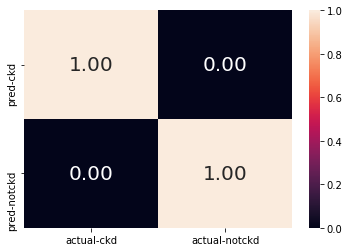

In [76]:
#visual interpretation of the confusion matrix 

sns.heatmap(cm,annot=True,xticklabels=['actual-ckd','actual-notckd'],yticklabels=['pred-ckd','pred-notckd'],fmt='0.2f',annot_kws={"size": 20})
plt.savefig('random_forest_confusion_matrix.pdf', format='pdf', dpi=1200)
plt.show()

# Final Model (ENSEMBLE of two model)

In [77]:

from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('rf', clf2), ('log_reg', clf1)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [78]:
ensemble.fit(x_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [79]:
ensemble.score(x_tst,y_tst)

0.98

In [80]:
pred_ens=ensemble.predict(x_test)

In [81]:
# final prediction may vary as in every alternate try grid search may converge to a different value 
cm = confusion_matrix(y_tst,pred_ens)
cm
cm=cm/cm.sum(axis=1) #normalise the confusion matrix to see in percentage
cm

array([[1.        , 0.        ],
       [0.05128205, 0.96721311]])

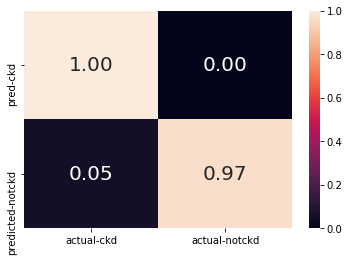

In [82]:
#visual interpretation of the confusion matrix 

sns.heatmap(cm,annot=True,xticklabels=['actual-ckd','actual-notckd'],yticklabels=['pred-ckd','predicted-notckd'],fmt='0.2f',annot_kws={"size": 20})
plt.savefig('ensemble_confusion_matrix.pdf', format='pdf', dpi=1200)
plt.show()

In [83]:
# Print Classification report
from sklearn.metrics import classification_report
print(classification_report(y_tst,pred_ens))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        39
         1.0       1.00      0.97      0.98        61

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

